<a href="https://colab.research.google.com/github/gabrieldorte/analise_data_base_imobiliaria/blob/main/analise_dados_loja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#DEFINIÇÃO DAS PALETAS DE CORES
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

In [2]:
#IMPORTAÇÃO DAS BIBLIOTECAS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import transforms
import matplotlib.dates as mdates
import plotly.express as px
from matplotlib.patches import Ellipse

In [3]:
#BASE DE DADOS
vendas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/relatorio_vendas.csv")
vendas.head()

,data_pedido,data_envio,modo_envio,nome_cliente,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro
0,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,encanamentos,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,ferramentas,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2018-06-13,2018-06-17,Econômica,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sudeste,Jardinagem e paisagismo,sementes,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Materiais de construção,materiais de revestimento,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Jardinagem e paisagismo,vasos,35.88,42.24,0.100,38.02,2,76.04,4.28


In [4]:
vendas['data_pedido'] = pd.to_datetime(vendas['data_pedido'], format = "%Y-%m-%d")
vendas['data_envio'] = pd.to_datetime(vendas['data_envio'], format = "%Y-%m-%d")
vendas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   data_pedido          8940 non-null   datetime64[ns]
 1   data_envio           8940 non-null   datetime64[ns]
 2   modo_envio           8940 non-null   object        
 3   nome_cliente         8940 non-null   object        
 4   segmento_cliente     8940 non-null   object        
 5   cidade               8940 non-null   object        
 6   estado               8940 non-null   object        
 7   regiao               8940 non-null   object        
 8   departamento         8940 non-null   object        
 9   tipo_produto         8940 non-null   object        
 10  preco_base           8940 non-null   float64       
 11  preco_unit_sem_desc  8940 non-null   float64       
 12  desconto             8940 non-null   float64       
 13  preco_unit_venda     8940 non-nul

In [5]:
#TABELA QUAL ANO OBTEVE AS MELHORES VENDAS
df_vendas_ano = vendas.copy()
df_vendas_ano = df_vendas_ano[["data_pedido", "vendas"]]
df_vendas_ano["ano"] = df_vendas_ano.data_pedido.dt.year
df_vendas_ano.drop(labels = "data_pedido", axis = 1, inplace = True)
df_vendas_ano = df_vendas_ano.groupby("ano").aggregate("sum")
df_vendas_ano

,vendas
ano,
2016,1402652.33
2017,1489179.52
2018,1884161.41
2019,2305006.29


<ipython-input-11-1fdd28510d65>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = df_vendas_ano, x = df_vendas_ano.index, y = "vendas", palette = cores)


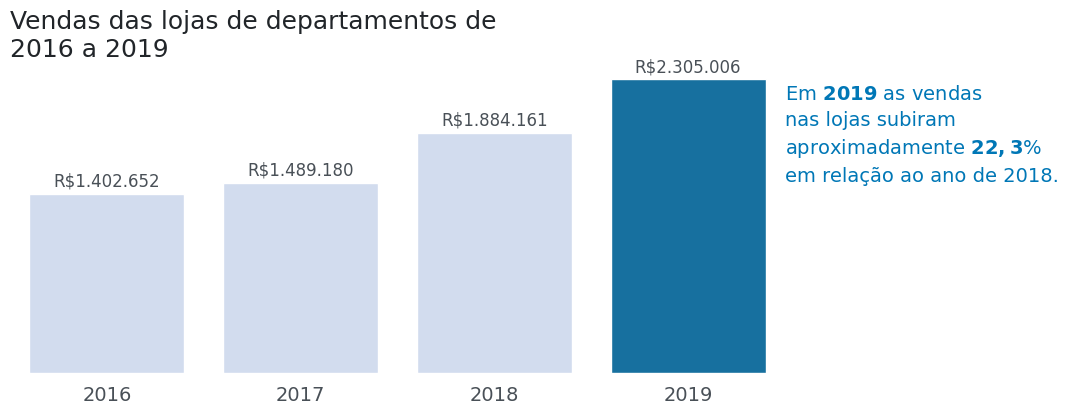

In [11]:
#FUNCAO PARA O GRÁFICO DE VENDAS POR ANO
def grafico_vendas(cores: list=[AZUL2]):
  fig, ax = plt.subplots(figsize = (10,4))
  sns.set_theme(style = "white")
  ax = sns.barplot(data = df_vendas_ano, x = df_vendas_ano.index, y = "vendas", palette = cores)
  ax.set_title("Vendas das lojas de departamentos de \n2016 a 2019", loc = "left", fontsize = 18, color = CINZA1)
  ax.set_xlabel("")
  ax.set_ylabel("")
  ax.xaxis.set_tick_params(labelsize = 14, labelcolor = CINZA2)
  sns.despine(left = True, bottom = True)
  ax.set_yticklabels([])
  for i, valor in enumerate(df_vendas_ano["vendas"]):
    qtd = f'R${valor:,.0f}'.replace(',','.')
    offset = 1e5
    ax.text(i, valor + offset, qtd, color = CINZA2, fontsize = 12, ha = "center", va = "center")
  return ax
cores = []
for ano in df_vendas_ano.index:
  if df_vendas_ano.loc[ano, "vendas"] == df_vendas_ano.vendas.max():
    cores.append(AZUL2)
  else:
    cores.append(AZUL5)
ax = grafico_vendas(cores)
ax.text(3.5, 1.5e6,
        'Em $\\bf{2019}$ as vendas\n'
        'nas lojas subiram\n'
        'aproximadamente $\\bf{22,3}$%\n'
        'em relação ao ano de 2018.',
        fontsize = 14, linespacing = 1.45, color = AZUL2)
fig = ax.get_figure()


In [12]:
#TABELA SOBRE LUCROS POR TIPO DE PRODUTO
top_lucro = vendas.copy()
top_lucro = top_lucro[["tipo_produto", "lucro"]]
top_lucro = top_lucro.groupby("tipo_produto").agg("sum").sort_values("lucro", ascending = False)
top_7 = top_lucro.head(7)
top_7

,lucro
tipo_produto,
peças de reposição,91148.67
pneus,67460.05
ferramentas automotivas,63330.22
pesticidas,53343.89
ferramentas de jardinagem,53202.88
ferramentas,41020.34
vasos,33941.85


<ipython-input-14-008c28ee6be9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = top_7, x = "lucro", y = top_7.index, palette = cores)


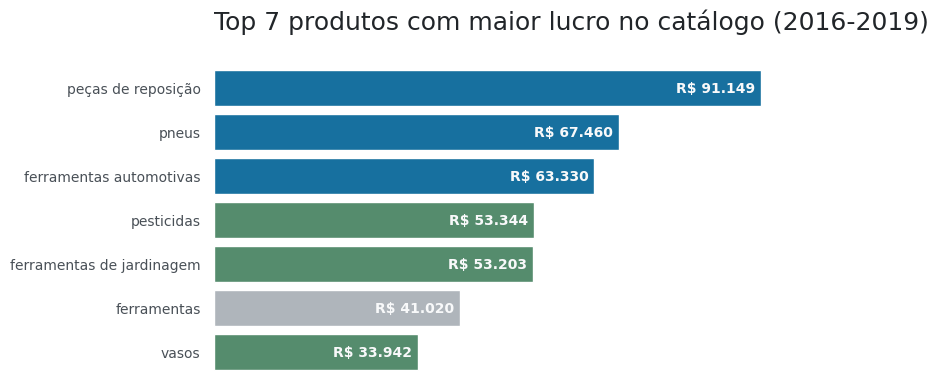

In [14]:
#GERANDO O GRÁFICO DA TABELA DE LUCROS

#FUNÇÃO DO GRÁFICO
def grafico_top_7():
  fig, ax = plt.subplots(figsize=(10,4))
  fig.subplots_adjust(right=0.7)
  sns.set_theme(style="white")
  cores = [AZUL2, AZUL2, AZUL2, VERDE1, VERDE1, CINZA3, VERDE1]
  ax = sns.barplot(data = top_7, x = "lucro", y = top_7.index, palette = cores)
  ax.set_title('Top 7 produtos com maior lucro no catálogo (2016-2019)\n', fontsize=18, color=CINZA1, loc='left')
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_xticklabels([])
  ax.yaxis.set_tick_params(labelsize=10, labelcolor = CINZA2)
  sns.despine(left = True, bottom = True)
  for i, valor in enumerate(top_7['lucro']):
    qtd = f'R$ {valor:,.0f}'.replace(',','.')
    offset = 1e3
    ax.text(valor - offset, i, qtd, color= CINZA5, fontsize=10, fontweight='bold', ha='right', va='center')
  return ax
#FUNÇÃO PARA AS CORES DO GRÁFICO
def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

ax = grafico_top_7()

<ipython-input-14-008c28ee6be9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = top_7, x = "lucro", y = top_7.index, palette = cores)


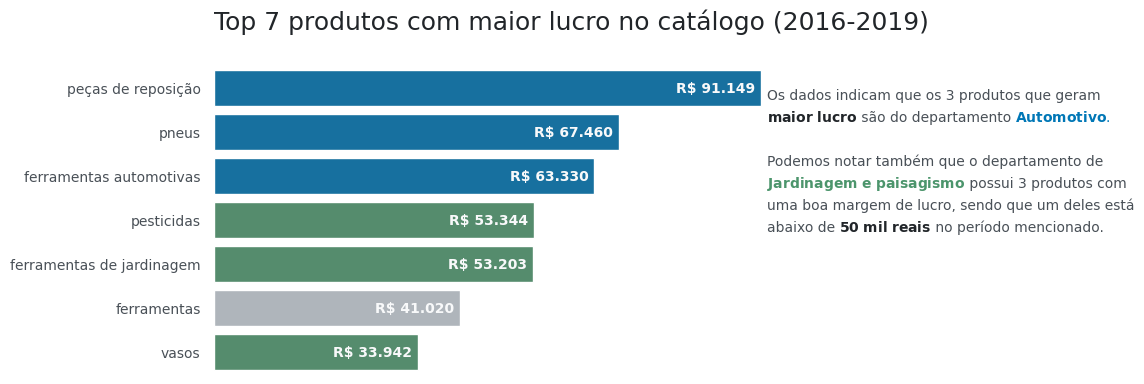

In [15]:
#ANOTAÇÕES PARA UMA MELHOR CONCLUSÃO DO GRÁFICO
ax = grafico_top_7()
texto_colorido(
    9.2e4, 3.25,                                                        # coordenadas
    'Os dados indicam que os 3 produtos que geram\n'                    # texto
    '$\\bf{maior\ lucro}$|| são do departamento ||$\\bf{Automotivo}$.\n'
    '\n'
    'Podemos notar também que o departamento de\n'
    '$\\bf{Jardinagem\ e\ paisagismo}$|| possui 3 produtos com\n'
    'uma boa margem de lucro, sendo que um deles está\n'
    'abaixo de ||$\\bf{50\ mil\ reais}$|| no período mencionado.',
    [[CINZA2],                        # linha 1                          # cores
     [CINZA1, CINZA2, AZUL2],         # linha 2
     [CINZA2],                        # linha 3
     [CINZA2],                        # linha 4
     [VERDE1, CINZA2],                # linha 5
     [CINZA2],                        # linha 5
     [CINZA2, CINZA1, CINZA2]        # linha 7
    ],
    esp=22, # espaçamento
    ax=ax, # figura onde desenhar o texto
    fontsize=10)

fig = ax.get_figure()